# <h1><center>PYTHON CODES FOR PROJECT</center></h1>.

# Libraries

In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
import math

from pandas import read_csv
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sb
import seaborn as sns
import pylab

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import lasso_path, enet_path
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import MeanCenterer

from itertools import cycle

## Data Exploration


In [2]:
#Checking the Dependent Variables, Independent Variables, Constants and Steel grades 

dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
int_data=dataframe.drop(['Steel','Texp','Pa','Rc','lnRc'], axis = 1)
dataframe = pd.DataFrame(dataframe)
dataframe

,Steel,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345,770
1,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066,805
2,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783,825
3,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732,840
4,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759,755
1268,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612,775
1269,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465,790
1270,XOM07,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465,650


In [3]:
int_data.describe()

#There are no missing variables
#the mean and std are not same and requires Standardization to take care of outliers

,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,0.279198,0.484733,0.945165,0.603813,0.198035,0.517162,0.037846,0.097421,2.047720
std,0.152034,0.503829,0.559432,0.668445,0.247477,0.958594,0.191431,0.217629,5.445686
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.270000,0.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.280000,0.330000,0.820000,0.410000,0.060000,0.060000,0.000000,0.000000,0.000000
75%,0.380000,0.450000,1.322500,1.070000,0.350000,0.510000,0.000000,0.180000,0.000000
max,0.860000,2.630000,5.030000,5.480000,1.320000,5.290000,2.110000,2.030000,31.600000


## Data Preprocessing 

In [4]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(int_data)
interaction1
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(int_data), columns=interaction.get_feature_names(int_data.columns))
features = pd.DataFrame(features)
interaction_data = features
interaction_data

a = dataframe[dataframe.columns[-4:]]
frames = [interaction_data, a]
data = pd.concat(frames, axis=1)
data

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.0140,0.0028,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650


In [5]:
x=data.drop(['Texp'], axis = 1)
y=data.Texp
x=x.astype(float)
y=y.astype(float)

scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

rescaledX=pd.DataFrame(rescaledX)
data = rescaledX

data = data.set_axis(['1', 'C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'C Si',
       'C Mn', 'C Cr', 'C Mo', 'C Ni', 'C Al', 'C Cu', 'C ppmB', 'Si Mn',
       'Si Cr', 'Si Mo', 'Si Ni', 'Si Al', 'Si Cu', 'Si ppmB', 'Mn Cr',
       'Mn Mo', 'Mn Ni', 'Mn Al', 'Mn Cu', 'Mn ppmB', 'Cr Mo', 'Cr Ni',
       'Cr Al', 'Cr Cu', 'Cr ppmB', 'Mo Ni', 'Mo Al', 'Mo Cu', 'Mo ppmB',
       'Ni Al', 'Ni Cu', 'Ni ppmB', 'Al Cu', 'Al ppmB', 'Cu ppmB', 'C Si Mn',
       'C Si Cr', 'C Si Mo', 'C Si Ni', 'C Si Al', 'C Si Cu', 'C Si ppmB',
       'C Mn Cr', 'C Mn Mo', 'C Mn Ni', 'C Mn Al', 'C Mn Cu', 'C Mn ppmB',
       'C Cr Mo', 'C Cr Ni', 'C Cr Al', 'C Cr Cu', 'C Cr ppmB', 'C Mo Ni',
       'C Mo Al', 'C Mo Cu', 'C Mo ppmB', 'C Ni Al', 'C Ni Cu', 'C Ni ppmB',
       'C Al Cu', 'C Al ppmB', 'C Cu ppmB', 'Si Mn Cr', 'Si Mn Mo', 'Si Mn Ni',
       'Si Mn Al', 'Si Mn Cu', 'Si Mn ppmB', 'Si Cr Mo', 'Si Cr Ni',
       'Si Cr Al', 'Si Cr Cu', 'Si Cr ppmB', 'Si Mo Ni', 'Si Mo Al',
       'Si Mo Cu', 'Si Mo ppmB', 'Si Ni Al','Si Ni Cu', 'Si Ni ppmB', 'Si Al Cu', 'Si Al ppmB',
       'Si Cu ppmB', 'Mn Cr Mo', 'Mn Cr Ni', 'Mn Cr Al', 'Mn Cr Cu',
       'Mn Cr ppmB', 'Mn Mo Ni', 'Mn Mo Al', 'Mn Mo Cu', 'Mn Mo ppmB',
       'Mn Ni Al', 'Mn Ni Cu', 'Mn Ni ppmB', 'Mn Al Cu', 'Mn Al ppmB',
       'Mn Cu ppmB', 'Cr Mo Ni', 'Cr Mo Al', 'Cr Mo Cu', 'Cr Mo ppmB',
       'Cr Ni Al', 'Cr Ni Cu', 'Cr Ni ppmB', 'Cr Al Cu', 'Cr Al ppmB',
       'Cr Cu ppmB', 'Mo Ni Al', 'Mo Ni Cu', 'Mo Ni ppmB', 'Mo Al Cu',
       'Mo Al ppmB', 'Mo Cu ppmB', 'Ni Al Cu', 'Ni Al ppmB', 'Ni Cu ppmB',
       'Al Cu ppmB', 'Pa','Rc','lnRc'], axis=1, inplace=False)

data.describe()


#The mean is zero with standard deviation also being 1, hence the data has been standardized

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
count,1272.0,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03,...,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1272.000000,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03
mean,0.0,3.351617e-17,-6.703233e-17,8.937644e-17,0.000000,8.937644e-17,-3.351617e-17,-3.351617e-17,-8.379042e-17,1.117206e-16,...,5.586028e-18,0.000000,-1.117206e-17,2.234411e-17,0.000000,0.000000,-2.234411e-17,1.698152e-15,2.234411e-17,-1.396507e-17
std,0.0,1.000393e+00,1.000393e+00,1.000393e+00,1.000393,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00,...,1.000393e+00,1.000393,1.000393e+00,1.000393e+00,1.000393,1.000393,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00
min,0.0,-1.705544e+00,-9.624766e-01,-1.690174e+00,-0.903665,-8.005285e-01,-5.397128e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,-1.599698e+00,-2.656918e-01,-1.979480e+00
25%,0.0,-7.843330e-01,-4.263694e-01,-6.708822e-01,-0.903665,-8.005285e-01,-5.397128e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,-6.411991e-01,-2.631797e-01,-8.446351e-01
50%,0.0,5.276478e-03,-3.072345e-01,-2.238242e-01,-0.290060,-5.579865e-01,-4.770965e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,-3.132128e-01,-2.509783e-01,-1.277055e-01
75%,0.0,6.632844e-01,-6.896464e-02,6.747623e-01,0.697694,6.143000e-01,-7.474246e-03,-1.977777e-01,3.795961e-01,-3.761740e-01,...,-1.098868e-01,-0.130638,-8.992502e-02,-8.266487e-02,-0.090785,-0.102897,-1.954022e-01,1.384854e-01,-1.223250e-01,8.217961e-01
max,0.0,3.821722e+00,4.259605e+00,7.304632e+00,7.297688,4.535396e+00,4.980958e+00,1.082880e+01,8.883648e+00,5.428867e+00,...,1.708205e+01,15.347860,2.098018e+01,1.938510e+01,22.167151,23.945319,1.174974e+01,3.624296e+00,1.364017e+01,2.738349e+00


#### The bell curve

/home/dave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


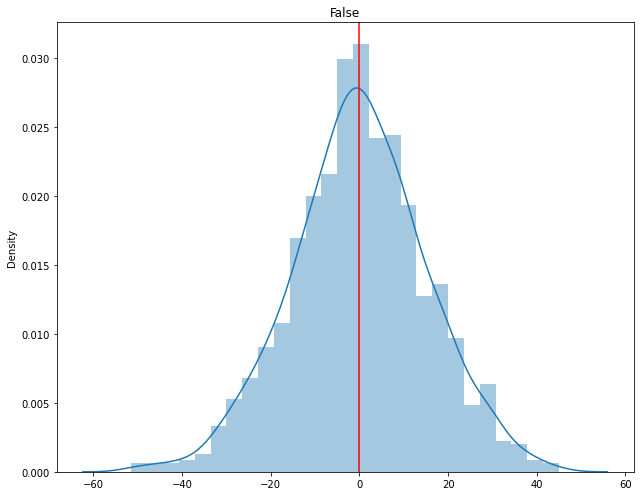

In [6]:
#Visualizing the standardized dataset using the bell curve plot

x=data
x=x.astype(float)
y=y.astype(float)

model_Simple = sm.OLS(y, x).fit()
x2 = sm.add_constant(x, prepend=True, has_constant='skip')
model = sm.OLS(y, x2).fit()
residuals=model.resid

fig,axes = plt.subplots(1,1,figsize=(9,7))
axlist = axes

sb.distplot(residuals,hist=True, kde=True, ax=axlist)
axlist.axvline(x=np.mean(residuals), color =  'r')
axlist.set_title(residuals.empty)
plt.tight_layout()

#### Log transformation

/home/dave/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dave/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dave/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


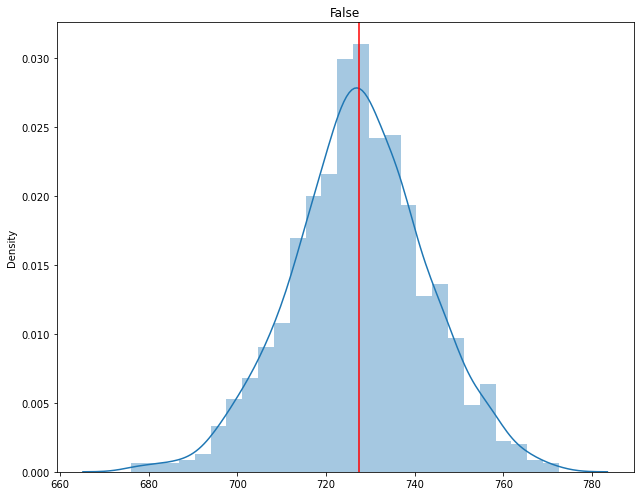

In [7]:
#confirming the standardization; another form of transforming data 
#it affirms the previous step, checks normal distribution too


transformed_data=data.transform(func = lambda x : np.sqrt(x))
transformed_data1=data.transform(func = lambda x : np.log(x))
transformed_data2=data.transform(func = lambda x : np.exp(x))

transformed_data1 = pd.DataFrame.values
transformed_x1=x
transformed_y1=y
transformed_x1=x.astype(float)
transformed_y1=y.astype(float)

transformed_x3 = sm.add_constant(transformed_x1, prepend=True, has_constant='skip')
model = sm.OLS(transformed_y1, transformed_x1).fit()
transformed_residuals1=model.resid
#model.summary()

fig,axes = plt.subplots(1,1,figsize=(9,7))
axlist = axes

sb.distplot(transformed_residuals1,hist=True, kde=True, ax=axlist)
axlist.axvline(x=np.mean(transformed_residuals1), color =  'r')
axlist.set_title(transformed_residuals1.empty)
plt.tight_layout()


# SAMPLING
##### Pearson Correlation

In [8]:
#Since the Data in normally Distribution, we use the Pearson Correlation
DATA=dataframe.drop(['Steel','Pa','Rc','lnRc'], axis = 1)
cor = DATA.corr()
cor_target = abs(cor["Texp"])
cor_target = pd.DataFrame(cor_target)
print(mean(cor_target))
cor_target

Texp    0.261353
dtype: float64


,Texp
C,0.459960
Si,0.114349
Mn,0.172845
Cr,0.019890
Mo,0.023583
Ni,0.419897
Al,0.182651
Cu,0.027722
ppmB,0.192632
Texp,1.000000


In [9]:
#The correlation_mean is less than 0.5, hence there is less
#correlation and therefore data division shouldnt be 50% :50%

### Train, Test and Validation 
####  Stratified Random Sampling

In [10]:
#Stratified Random Sampling Uses Mutual Exclusiveness
train_ratio = 0.50
validation_ratio = 0.40
test_ratio = 0.10
x=x2
y=y

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size=test_ratio/(test_ratio + validation_ratio), random_state=0) 

#   <h1><center>LASSO REGULARIZATION!</center></h1>.

## The Train Dataset

<ipython-input-11-229e8d5aece1>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67304.25550358678, tolerance: 148.00408490566042
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26982.320314504104, tolerance: 148.00408490566042
  mode

Computing regularization path using the lasso...


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85516.0721878488, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87932.64178067679, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100883.69783358311, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWar

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146879.73091410138, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146892.4444572142, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146901.64446943733, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceW

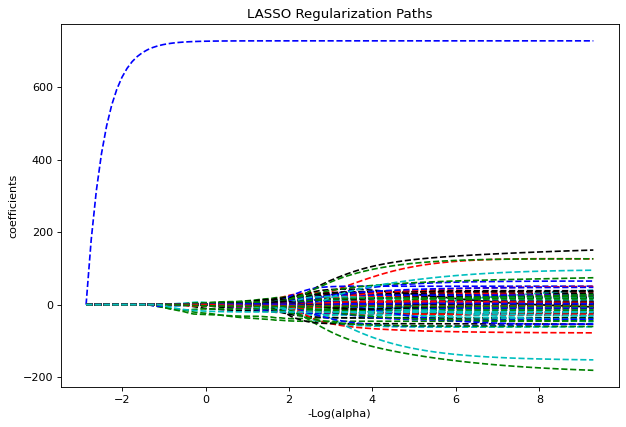

In [11]:

lasso_df = pd.DataFrame({'variable': x.columns})
lasso_train_pred = {}
lasso_test_pred = {}

alphas = np.arange(0, 1, 0.01)

for n, alpha in enumerate(alphas):
    if (n<30):
        lasso_reg = Lasso(alpha=alpha)
        lasso_reg.fit(X_train, y_train)
        var_name = 'alpha ' + str(round(alpha,5))
        lasso_df[var_name] = lasso_reg.coef_
        lasso_test_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(X_test)
    else:
        pass

lasso_df =lasso_df.set_index('variable').T

int_data=X_train.drop(['1'], axis = 1)
int_data=int_data.reset_index(drop=True)
int_data.columns = int_data.columns.str.replace('const', '1')

y_train = pd.DataFrame(y_train)
X_div=int_data
y_div=y_train
X_div=x.astype(float)
y_div=y.astype(float)

eps = 7e-13  
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_div, y_div, eps=eps)

# Display results
plt.figure(figsize=(9, 6), dpi=80)

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("LASSO Regularization Paths")
plt.axis("tight")
plt.show()

## The general divergence of LASSO and ElasticNet has been plotted
## It diverged at a point

### Test Dataset for Parameter Tuning (RMSE)

In [12]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(lasso_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in lasso_test_pred.keys():
    predicted = lasso_test_pred[alpha ] 
    observed = y_test.values
    RMSE( predicted, observed)
    my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
print (df1)

#Diverges when alpha = 0.05

         ALPHA       RMSE
0    alpha 0.0  19.936425
1   alpha 0.01  20.231669
2   alpha 0.02  20.278719
3   alpha 0.03  19.736821
4   alpha 0.04  19.235554
5   alpha 0.05  19.157588
6   alpha 0.06  19.249755
7   alpha 0.07  19.320549
8   alpha 0.08  19.393141
9   alpha 0.09  19.479194
10   alpha 0.1  19.562841
11  alpha 0.11  19.667603
12  alpha 0.12  19.729926
13  alpha 0.13  19.785146
14  alpha 0.14  19.846834
15  alpha 0.15  19.902751
16  alpha 0.16  19.949873
17  alpha 0.17  19.991549
18  alpha 0.18  20.025919
19  alpha 0.19  20.063483
20   alpha 0.2  20.101147
21  alpha 0.21  20.130345
22  alpha 0.22  20.161543
23  alpha 0.23  20.190787
24  alpha 0.24  20.224839
25  alpha 0.25  20.259816
26  alpha 0.26  20.292283
27  alpha 0.27  20.325906
28  alpha 0.28  20.357938
29  alpha 0.29  20.384247


In [13]:
model = sm.OLS(y_train, X_train)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=1, alpha=0.05, start_params=results_fu.params, refit=False)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_lasso = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     41.87
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          6.26e-206
Time:                        10:13:48   Log-Likelihood:                -2577.9
No. Observations:                 636   AIC:                             5422.
Df Residuals:                     503   BIC:                             6014.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        726.3489      3.713    195.603      0.000     719.053     733.645
1                   0   2.57e-11          0      1.000   -5.06e-11    5.06e-11
C            -42.2385      3.740    -11.295      0.000     -49.586     -34.891
Si           -33.8415     12.033     -2.812      0.005     -57.483     -10.200
Mn           -22.2802      3.583     -6.218      0.000     -29.320     -15.240
Cr           -30.3779     11.431     -2.658      0.008     -52.836      -7.920
Mo                  0      7.890          0      1.000     -15.502      15.502
Ni           -25.3060     10.554     -2.398      0.017     -46.041      -4.570
Al            95.5098    272.135      0.351      0.726    -439.151     630.170
Cu           -31.4156     10.818     -2.904      0.004     -52.670     -10.161
ppmB         -11.9719     73.819     -0.162      0.871    -157.004     133.060
C Si          34.4312     12.499      2.755      0.006       9.874      58.989
C Mn          -9.2959      4.398     -2.114      0.035     -17.937      -0.655
C Cr          14.8522      9.925      1.497      0.135      -4.647      34.351
C Mo         -18.1813     10.689     -1.701      0.090     -39.181       2.818
C Ni          -8.5815      9.223     -0.930      0.353     -26.702       9.539
C Al          26.0380    165.304      0.158      0.875    -298.733     350.809
C Cu          20.8277      4.754      4.381      0.000      11.487      30.169
C ppmB       -46.3353     74.286     -0.624      0.533    -192.285      99.614
Si Mn         33.7501     12.352      2.732      0.007       9.483      58.017
Si Cr         11.1571     14.683      0.760      0.448     -17.690      40.004
Si Mo          3.3981     14.135      0.240      0.810     -24.372      31.168
Si Ni         -6.5890     14.767     -0.446      0.656     -35.603      22.425
Si Al       -242.5107    291.999     -0.831      0.407    -816.199     331.177
Si Cu         24.3778     11.863      2.055      0.040       1.071      47.684
Si ppmB       21.2666     62.096      0.342      0.732    -100.734     143.267
Mn Cr         -3.2394      6.196     -0.523      0.601     -15.412       8.933
Mn Mo         -0.4566      7.812     -0.058      0.953     -15.805      14.892
Mn Ni          6.4832      7.523      0.862      0.389      -8.297      21.264
Mn Al       -199.8764    116.403     -1.717      0.087    -428.573      28.820
Mn Cu         -3.5482     11.335     -0.313      0.754     -25.817      18.721
Mn ppmB       -2.3541    120.879     -0.019      0.984    -239.845     235.137
Cr Mo         13.5942      7.663      1.774      0.077      -1.462      28.650
Cr Ni          0.8083      6.279      0.129      0.898     -11.528      13.144
Cr Al        333.5818    234.304      1.424      0.155    -126.753     793.916
Cr Cu          2.4244      8.550      0.284      0.777     -14.373      19.222
Cr

# <h1><center>ELASTIC_NET REGULARIZATION !</center></h1>.

## Train Dataset

<ipython-input-14-aaa734e07c07>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(X_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67304.25550358678, tolerance: 148.00408490566042
  model = cd_fast.enet_coordinate_descent(
<ipython-input-14-aaa734e07c07>:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic_reg.fit(X_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordina

Computing regularization path using the elastic net...


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76662.76581957215, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100201.98506023246, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110533.41763121658, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceW

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147090.1057685252, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147069.90405112275, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147052.25131681038, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceW

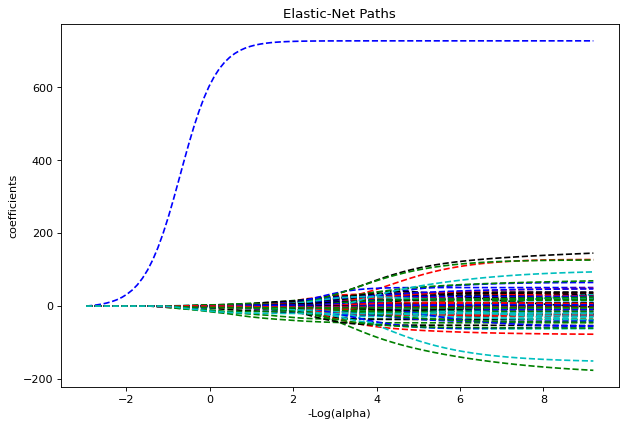

In [14]:
elastic = linear_model.ElasticNet(alpha=0)
elastic.fit(X_train, y_train)
elastic_df = pd.DataFrame({'variable': x.columns})
elastic_train_pred = {}
elastic_test_pred = {}
elastic_val_pred = {}

alphas = np.arange(0, 1, 0.01)


for n, alpha in enumerate(alphas):
    if (n<10):
        elastic_reg =linear_model.ElasticNet(alpha=alpha)
        elastic_reg.fit(X_train, y_train)
        var_name = 'alpha ' + str(round(alpha,5))
        elastic_df[var_name] = elastic.coef_
        # prediction
        elastic_train_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(X_train)
        elastic_test_pred['alpha '+str(round(alpha,5))]=elastic_reg.predict(X_test)
        elastic_val_pred['alpha '+str(round(alpha,5))]=elastic_reg.predict(X_val)

    else:
        pass


int_data=X_train.drop(['1'], axis = 1)
int_data=int_data.reset_index(drop=True)
int_data.columns = int_data.columns.str.replace('const', '1')

y_train = pd.DataFrame(y_train)
X_div=int_data
y_div=y_train
X_div=x.astype(float)
y_div=y.astype(float)

eps = 7e-13  
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X_div, y_div, eps=eps, l1_ratio=0.8)

# Display results
plt.figure(figsize=(9, 6), dpi=80)

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net Paths")
plt.axis("tight")

plt.show()


### Test Data for Parameter Tuning (RMSE)

In [15]:
elastic_df.iloc[9,:]*X_test
elastic_test=elastic_df.iloc[9,:]*X_test
#b=len(elastic_test_pred['alpha 0.008'])
#b=len(elastic_test_pred[alpha])

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(lasso_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in elastic_test_pred.keys():
    predicted = elastic_test_pred[alpha ] 
    observed = y_test.values
    RMSE( predicted, observed)
    my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
df1


,ALPHA,RMSE
0,alpha 0.0,19.936425
1,alpha 0.01,19.298252
2,alpha 0.02,19.433696
3,alpha 0.03,19.581993
4,alpha 0.04,19.740338
5,alpha 0.05,19.878320
6,alpha 0.06,20.007331
7,alpha 0.07,20.137128
8,alpha 0.08,20.261154
9,alpha 0.09,20.381933


In [16]:
model = sm.OLS(y_train, X_train)

results_fu = model.fit()
results_fr=model.fit_regularized(method='elastic_net', L1_wt=1, alpha = 0.01,
                                 start_params=results_fu.params, refit=False)

results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_ElasticNet = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_ElasticNet.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     42.63
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.04e-207
Time:                        10:13:57   Log-Likelihood:                -2572.6
No. Observations:                 636   AIC:                             5411.
Df Residuals:                     503   BIC:                             6004.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        726.1410      3.683    197.184      0.000     718.906     733.376
1                   0   2.55e-11          0      1.000   -5.01e-11    5.01e-11
C            -43.5088      3.709    -11.732      0.000     -50.795     -36.222
Si           -35.7570     11.933     -2.996      0.003     -59.203     -12.311
Mn           -21.8178      3.554     -6.140      0.000     -28.799     -14.836
Cr           -32.4397     11.336     -2.862      0.004     -54.711     -10.168
Mo                  0      7.825          0      1.000     -15.373      15.373
Ni           -25.9527     10.466     -2.480      0.013     -46.516      -5.389
Al            95.0137    269.875      0.352      0.725    -435.207     625.234
Cu           -32.4164     10.728     -3.022      0.003     -53.494     -11.339
ppmB         -15.4685     73.206     -0.211      0.833    -159.296     128.359
C Si          38.1047     12.396      3.074      0.002      13.751      62.458
C Mn          -9.2021      4.362     -2.110      0.035     -17.771      -0.633
C Cr          18.9798      9.842      1.928      0.054      -0.357      38.317
C Mo         -20.7883     10.600     -1.961      0.050     -41.614       0.037
C Ni          -8.4249      9.146     -0.921      0.357     -26.394       9.545
C Al          25.2558    163.931      0.154      0.878    -296.818     347.330
C Cu          22.5310      4.715      4.779      0.000      13.268      31.794
C ppmB       -47.7364     73.669     -0.648      0.517    -192.474      97.001
Si Mn         35.9543     12.249      2.935      0.003      11.889      60.020
Si Cr         11.8852     14.561      0.816      0.415     -16.723      40.493
Si Mo          5.9976     14.017      0.428      0.669     -21.542      33.537
Si Ni         -7.4707     14.645     -0.510      0.610     -36.243      21.302
Si Al       -245.1856    289.574     -0.847      0.398    -814.109     323.738
Si Cu         25.6524     11.764      2.181      0.030       2.540      48.765
Si ppmB       28.0242     61.581      0.455      0.649     -92.963     149.011
Mn Cr         -5.3833      6.144     -0.876      0.381     -17.455       6.688
Mn Mo         -0.3795      7.747     -0.049      0.961     -15.601      14.842
Mn Ni          9.1095      7.461      1.221      0.223      -5.548      23.767
Mn Al       -201.2459    115.437     -1.743      0.082    -428.044      25.552
Mn Cu         -7.2135     11.241     -0.642      0.521     -29.298      14.871
Mn ppmB       -5.9325    119.876     -0.049      0.961    -241.451     229.586
Cr Mo         16.3616      7.600      2.153      0.032       1.431      31.292
Cr Ni          1.4184      6.227      0.228      0.820     -10.815      13.652
Cr Al        337.5043    232.358      1.453      0.147    -119.007     794.016
Cr Cu          4.2245      8.479      0.498      0.619     -12.434      20.883
Cr

## Lasso and ElasticNet Convergence


Computing regularization path using the lasso...


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85516.0721878488, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87932.64178067679, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100883.69783358311, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWar

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146916.46281211864, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146916.88275724355, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146916.57380592613, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Convergence

Computing regularization path using the elastic net...


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76662.76581957215, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100201.98506023246, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110533.41763121658, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceW

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147140.54010911376, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147113.41549090366, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147090.1057685252, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceW

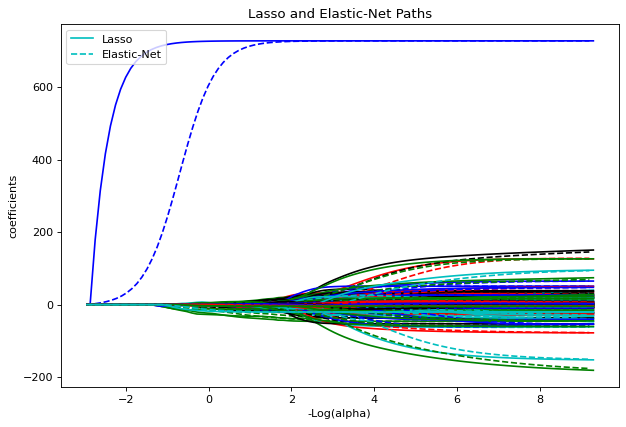

In [17]:

int_data=X_train.drop(['1'], axis = 1)
int_data=int_data.reset_index(drop=True)
int_data.columns = int_data.columns.str.replace('const', '1')

y_train = pd.DataFrame(y_train)
X_div=int_data
y_div=y_train
X_div=x.astype(float)
y_div=y.astype(float)

eps = 7e-13  
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_div, y_div, eps=eps)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X_div, y_div, eps=eps, l1_ratio=0.8)

# Display results
plt.figure(figsize=(9, 6), dpi=80)
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="upper left")
plt.axis("tight")

plt.show()


## Validation

### Lasso 

In [18]:
model = sm.OLS(y_val, X_val)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=1, alpha=0.05, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     25.11
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.29e-128
Time:                        10:14:06   Log-Likelihood:                -2064.1
No. Observations:                 508   AIC:                             4394.
Df Residuals:                     375   BIC:                             4957.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        722.7656      4.934    146.496      0.000     713.064     732.467
1                   0   1.85e-11          0      1.000   -3.65e-11    3.65e-11
C            -47.3583      5.396     -8.777      0.000     -57.968     -36.749
Si           -18.4348      9.902     -1.862      0.063     -37.905       1.036
Mn           -28.1279      5.654     -4.975      0.000     -39.246     -17.010
Cr           -25.0334     12.750     -1.963      0.050     -50.104       0.038
Mo            -9.2786     13.006     -0.713      0.476     -34.853      16.296
Ni           -31.5570     11.054     -2.855      0.005     -53.292      -9.822
Al           -42.1043    261.460     -0.161      0.872    -556.217     472.008
Cu           -38.5639     17.103     -2.255      0.025     -72.194      -4.934
ppmB         117.7659     86.466      1.362      0.174     -52.254     287.786
C Si          22.4866     11.975      1.878      0.061      -1.059      46.032
C Mn          -4.3385      6.740     -0.644      0.520     -17.591       8.914
C Cr          21.5412     10.809      1.993      0.047       0.287      42.795
C Mo         -26.1652     17.145     -1.526      0.128     -59.878       7.547
C Ni         -14.8108     12.233     -1.211      0.227     -38.866       9.244
C Al        -242.1434    168.495     -1.437      0.152    -573.457      89.170
C Cu          17.6344      7.213      2.445      0.015       3.451      31.818
C ppmB      -152.8489     82.338     -1.856      0.064    -314.750       9.053
Si Mn         23.5253      9.031      2.605      0.010       5.768      41.283
Si Cr        -28.0258     19.294     -1.453      0.147     -65.964       9.913
Si Mo         30.9076     22.511      1.373      0.171     -13.356      75.171
Si Ni        -16.2191     19.130     -0.848      0.397     -53.834      21.396
Si Al        340.5728    189.813      1.794      0.074     -32.659     713.804
Si Cu         12.3840     17.429      0.711      0.478     -21.888      46.656
Si ppmB      -23.3192     78.238     -0.298      0.766    -177.159     130.521
Mn Cr         -0.9134      7.076     -0.129      0.897     -14.827      13.001
Mn Mo         -1.5547      9.793     -0.159      0.874     -20.810      17.701
Mn Ni         13.6156     12.433      1.095      0.274     -10.832      38.064
Mn Al        -55.2436    323.950     -0.171      0.865    -692.230     581.743
Mn Cu         15.9184     18.146      0.877      0.381     -19.762      51.599
Mn ppmB      -95.7295     55.195     -1.734      0.084    -204.259      12.800
Cr Mo         24.6717      8.085      3.052      0.002       8.774      40.569
Cr Ni          1.5299      7.978      0.192      0.848     -14.157      17.217
Cr Al        422.5403    337.229      1.253      0.211    -240.556    1085.636
Cr Cu          7.7571     10.443      0.743      0.458     -12.777      28.292
Cr

### Elastic Net

In [19]:
model = sm.OLS(y_val, X_val)

results_fu = model.fit()
results_fr=model.fit_regularized(method='elastic_net', L1_wt=1, alpha = 0.008,
                                 start_params=results_fu.params, refit=False)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     25.53
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          8.80e-130
Time:                        10:14:10   Log-Likelihood:                -2060.3
No. Observations:                 508   AIC:                             4387.
Df Residuals:                     375   BIC:                             4949.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        722.3467      4.897    147.506      0.000     712.718     731.976
1                   0   1.84e-11          0      1.000   -3.62e-11    3.62e-11
C            -49.0126      5.356     -9.152      0.000     -59.543     -38.482
Si           -20.4249      9.828     -2.078      0.038     -39.751      -1.099
Mn           -27.6023      5.612     -4.918      0.000     -38.638     -16.567
Cr           -26.5649     12.656     -2.099      0.036     -51.450      -1.680
Mo            -9.9417     12.910     -0.770      0.442     -35.327      15.443
Ni           -34.2288     10.972     -3.120      0.002     -55.803     -12.655
Al           -42.7429    259.519     -0.165      0.869    -553.038     467.552
Cu           -41.5183     16.976     -2.446      0.015     -74.899      -8.138
ppmB         116.6656     85.824      1.359      0.175     -52.092     285.423
C Si          26.5826     11.886      2.237      0.026       3.212      49.954
C Mn          -4.5320      6.690     -0.677      0.499     -17.686       8.622
C Cr          26.7737     10.729      2.495      0.013       5.677      47.870
C Mo         -27.8427     17.018     -1.636      0.103     -61.305       5.619
C Ni         -14.1985     12.143     -1.169      0.243     -38.075       9.678
C Al        -243.0394    167.244     -1.453      0.147    -571.893      85.814
C Cu          19.5703      7.160      2.733      0.007       5.492      33.648
C ppmB      -154.8212     81.726     -1.894      0.059    -315.521       5.878
Si Mn         25.0248      8.964      2.792      0.006       7.399      42.650
Si Cr        -34.0576     19.151     -1.778      0.076     -71.714       3.599
Si Mo         36.4104     22.344      1.630      0.104      -7.524      80.345
Si Ni        -15.7820     18.988     -0.831      0.406     -53.118      21.554
Si Al        347.1376    188.404      1.843      0.066     -23.323     717.598
Si Cu         17.6828     17.300      1.022      0.307     -16.334      51.700
Si ppmB      -23.0425     77.657     -0.297      0.767    -175.740     129.655
Mn Cr         -0.7910      7.024     -0.113      0.910     -14.602      13.020
Mn Mo         -4.3634      9.720     -0.449      0.654     -23.476      14.749
Mn Ni         18.3866     12.341      1.490      0.137      -5.880      42.653
Mn Al        -61.0421    321.545     -0.190      0.850    -693.299     571.215
Mn Cu         15.5201     18.011      0.862      0.389     -19.895      50.936
Mn ppmB      -95.8435     54.785     -1.749      0.081    -203.567      11.881
Cr Mo         28.3774      8.025      3.536      0.000      12.598      44.157
Cr Ni          2.1659      7.919      0.274      0.785     -13.405      17.736
Cr Al        422.9315    334.725      1.264      0.207    -235.241    1081.104
Cr Cu          7.9144     10.366      0.764      0.446     -12.468      28.296
Cr

## Lasso and ElasticNet Convergence For Validation

Computing regularization path using the lasso...


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85516.0721878488, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87932.64178067679, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100883.69783358311, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWar

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146901.64446943733, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146908.09789801773, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146912.41306560038, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Convergence

Computing regularization path using the elastic net...


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110533.41763121658, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131493.6610850031, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139811.19528514013, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceW

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147052.25131681038, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147036.7106176684, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147022.9359081711, tolerance: 67606.052
  model = cd_fast.enet_coordinate_descent_gram(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWa

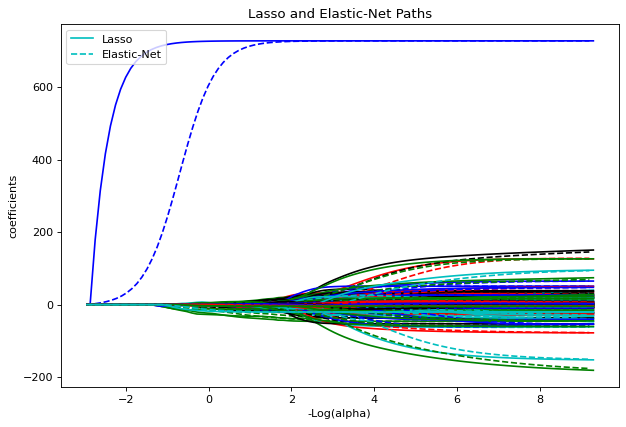

In [20]:

X_div=X_val
y_div=y_val
X_div=x.astype(float)
y_div=y.astype(float)

eps = 7e-13  
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_div, y_div, eps=eps)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X_div, y_div, eps=eps, l1_ratio=0.8)

# Display results
plt.figure(figsize=(9, 6), dpi=80)
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="upper left")
plt.axis("tight")

plt.show()


## The Stopping Criterion

### Lasso Stopping Criterion

In [21]:
coff = final_lasso.params
pval=final_lasso.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()

data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']

data12 = data12.set_index('index')

int_data=data12[:-3:]

dr = []
for row in range(131):
    if (int_data.iloc[row,1]>0.05):
        dr.append(int_data.index[row])
new_d = int_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)

d

<ipython-input-21-b9a794fa2975>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-21-b9a794fa2975>:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
const,726.348914,0.000000e+00
C,-42.238507,1.608403e-26
Mn,-22.280205,1.060563e-09
C Cu,20.827749,1.440021e-05
C Si Cu,-19.704917,2.024393e-03
Si Mo Al,303.365806,3.270494e-03
Cu,-31.415596,3.846482e-03
Si,-33.841461,5.111078e-03
Mo Al,-300.960039,5.365802e-03


### Elastic Net Stopping Criterion

In [64]:
coff = final_ElasticNet.params
pval=final_ElasticNet.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()
data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']
data12 = data12.set_index('index')
int_data=data12[:-3:]
int_data


dr = []
for row in range(131):
    if (int_data.iloc[row,1]>0.05):
        dr.append(int_data.index[row])
new_d = int_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
d.index
d


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-c834dbebee6d>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-64-c834dbebee6d>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
const,726.141005,0.000000e+00
C,-43.508790,2.910399e-28
Mn,-21.817802,1.679033e-09
C Cu,22.531038,2.319098e-06
C Si Cu,-21.905977,5.483089e-04
C Si,38.104686,2.226528e-03
Cu,-32.416395,2.642601e-03
Si Mo Al,305.421250,2.831785e-03
Si,-35.756980,2.867046e-03


## Validation

In [49]:
coff = final.params
pval=final.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()
data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']
data12 = data12.set_index('index')
int_data=data12[:-3:]
int_data


dr = []
for row in range(131):
    if (int_data.iloc[row,1]>0.05):
        dr.append(int_data.index[row])
new_d = int_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
d.index
d


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-52f5f5de7db9>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-49-52f5f5de7db9>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
const,722.346703,0.000000e+00
C,-49.012563,3.658602e-18
Mn,-27.602260,1.308955e-06
Cr Mo,28.377390,4.568653e-04
Ni,-34.228799,1.950211e-03
Al ppmB,67.884949,3.311304e-03
Si Mn,25.024827,5.510559e-03
C Cu,19.570275,6.564153e-03
Mo Al Cu,161.782889,1.261426e-02


In [23]:
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
#pd.DataFrame(d[:11])


 
<h1><center>OBJECTIVE TWO</center></h1>

 
<h1><center>The Johnson-Neyman Technique</center></h1>

In [24]:
c = dataframe[dataframe.columns[-4:]]
frames = [interaction_data, c]
data = pd.concat(frames, axis=1)
df = data
df

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.0140,0.0028,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650


<h1><center>Carbon(C) as a focal predictor  </center></h1>

### Conditional Effect of Si on C

*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.398]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


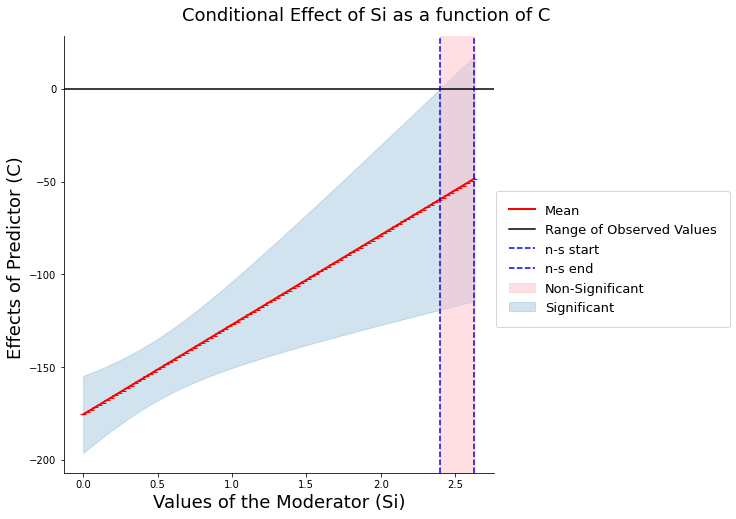

{'Negative on': [0.0, 2.398275239586364], 'Positive on': []}

In [25]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
p = Process(data=df, model=1, x="C",  m= "Si", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('Si', 'C')
g.fig.suptitle('Conditional Effect of Si as a function of C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=2.398275239586364, ls='--', c='blue' )
g.map(plt.axvline, x=2.63,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=2.398275239586364, xmax=2.63, ymin=-200, ymax=300, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", 
                  y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Cu on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Cu, Range = [0.0, 2.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 0.816]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


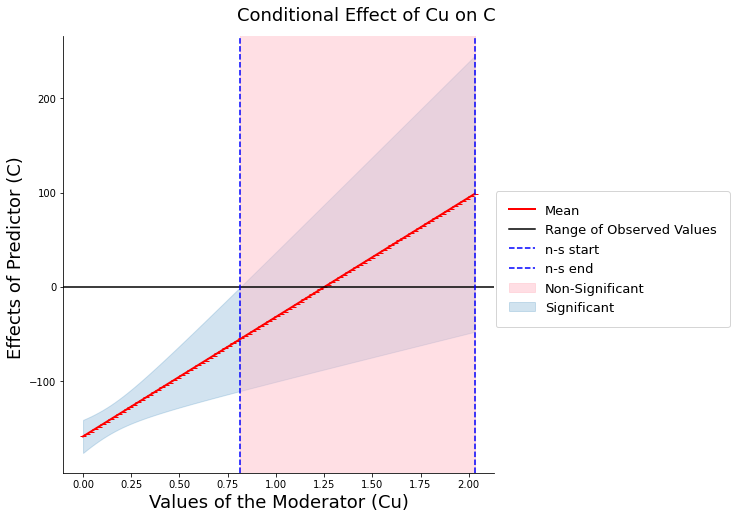

{'Negative on': [0.0, 0.8159584295155945], 'Positive on': []}

In [26]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="C",  m= "Cu", y="Texp", suppr_init=True) 
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()


mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Cu" 'g'}, x="Cu", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))
g.set_axis_labels('Cu', 'C')
g.fig.suptitle('Conditional Effect of Cu on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.8159584295155945, ls='--', c='blue' )
g.map(plt.axvline, x=2.03,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.8159584295155945, xmax=2.03, ymin=-200, ymax=300, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)

g.set_axis_labels(x_var="Values of the Moderator (Cu)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Mn on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Mn, Range = [0.0, 5.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 5.03]


****************************************************************************************



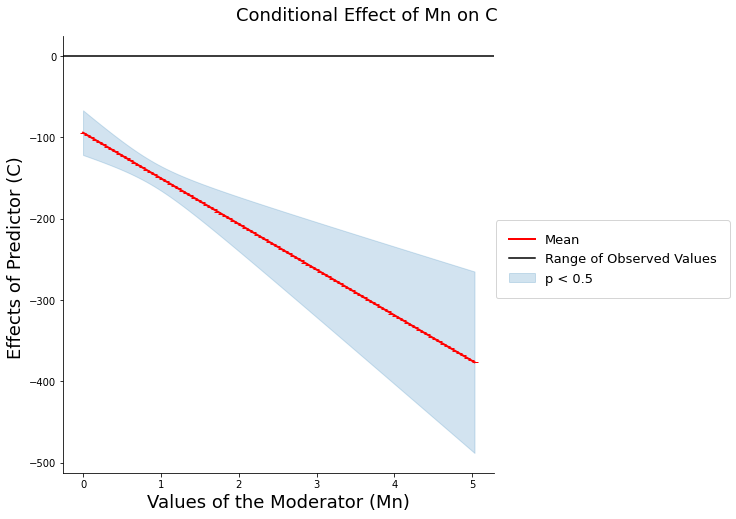

{'Negative on': [0.0, 5.03], 'Positive on': []}

In [27]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="C",  m= "Mn", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model
df_params_direct = direct_model.coeff_summary()


mm=p.floodlight_direct_effect(mod_name="Mn")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Mn")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Mn" 'g'}, x="Mn", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))
g.set_axis_labels('Mn', 'C')
g.fig.suptitle('Conditional Effect of Mn on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', "Range of Observed Values",'p < 0.5','','Confidence Interval'], fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Mn)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()



<h1><center> Mn as a focal predictor </center></h1>

### Conditional Effect of C on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    C, Range = [0.02, 0.86]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.09891, 0.86]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


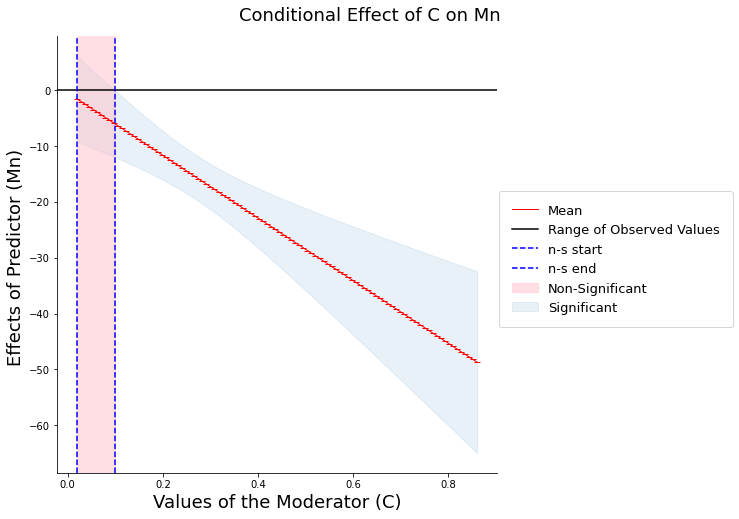

{'Negative on': [0.0989095865469426, 0.86], 'Positive on': []}

In [28]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Mn",  m= "C", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="C")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="C")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"C" 'g'}, x="C", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('C', 'Mn')
g.fig.suptitle('Conditional Effect of C on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.02, ls='--', c='blue' )
g.map(plt.axvline, x=0.09891,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.02, xmax=0.0989095865469426, ymin=-70, ymax=10, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (C)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Si on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 0.8983]
The direct effect is significantly positive on the interval [2.215, 2.63]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


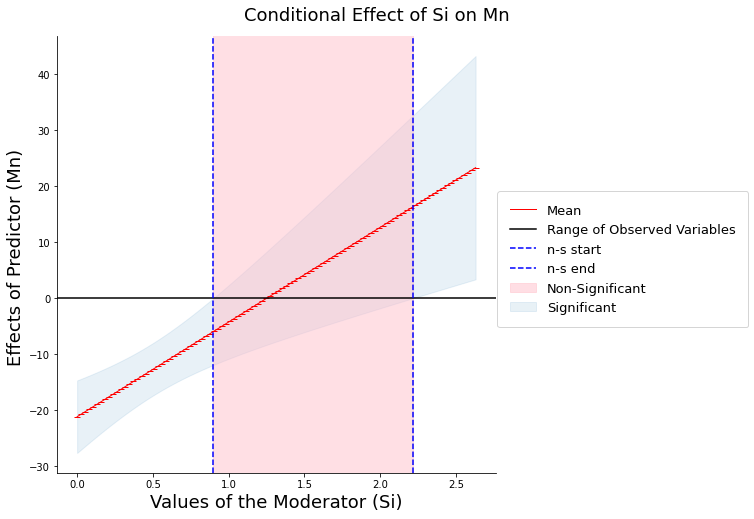

{'Negative on': [0.0, 0.8983175340664658],
 'Positive on': [2.214886462020073, 2.63]}

In [29]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Mn",  m= "Si", y="Texp", suppr_init=True)
#p.summary()

direct_model = p.direct_model
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Si', 'Mn')
g.fig.suptitle('Conditional Effect of Si on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.8983175340664658,    ls='--', c='blue' )
g.map(plt.axvline, x=2.214886462020073,   ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.8983175340664658, xmax=2.214886462020073, ymin=-30, ymax=40, alpha=0.5, color='pink')

g.add_legend(labels=['Mean', 'Range of Observed Variables',"n-s start",'n-s end','Non-Significant','Significant'], fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


<h1><center> JOHNSON NEYMAN 3 - WAY INTERACTION  </center></h1>

## The conditional effect of SiCu on C

### Conditional Effect of Cu on Si, THETA_1

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Cu, Range = [0.0, 2.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.03]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


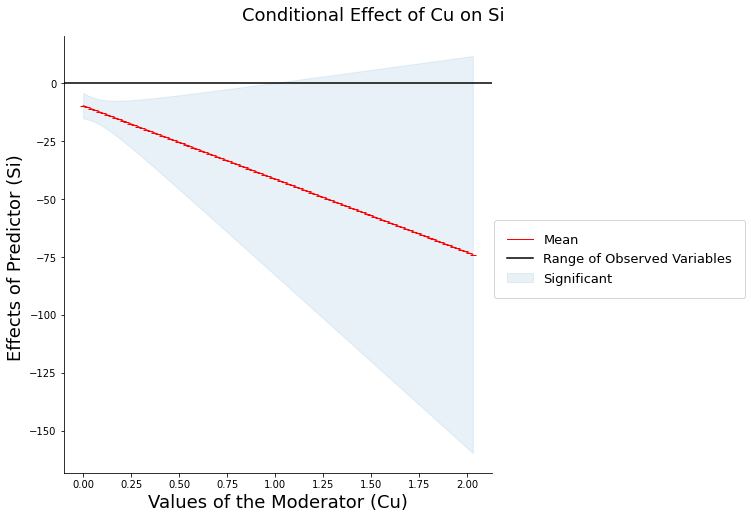

In [30]:
## from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Si",  m= "Cu", y="Texp", suppr_init=True)
direct_model = p.direct_model # The model for the direct effect
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Cu" 'g'}, x="Cu", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Cu', 'Si')
g.fig.suptitle('Conditional Effect of Cu on Si', fontsize=18)
g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Variables',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Cu)", y_var="Effects of Predictor (Si) ", fontsize=18)
plt.show(g)


In [31]:
from pyprocessmacro import utils as u
from pyprocessmacro import models as m
from pyprocessmacro import Process as p
p = Process(data=df, model=1, x="Si",  m= "Cu", y="Texp", suppr_init=True)

mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
a = data["Cu"]
a[:]
floodlight_motiv_direct= p.spotlight_direct_effect({"Cu":a[:]})
effect= floodlight_motiv_direct.Effect
effect = pd.DataFrame(effect)
floodlight_motiv_direct


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Effect,SE,LLCI,ULCI,Cu
0,-16.576297,4.680183,-25.749287,-7.403307,0.22
1,-16.576297,4.680183,-25.749287,-7.403307,0.22
2,-16.576297,4.680183,-25.749287,-7.403307,0.22
3,-16.576297,4.680183,-25.749287,-7.403307,0.22
4,-16.576297,4.680183,-25.749287,-7.403307,0.22
...,...,...,...,...,...
1267,-9.925171,2.700649,-15.218346,-4.631997,0.01
1268,-9.925171,2.700649,-15.218346,-4.631997,0.01
1269,-9.925171,2.700649,-15.218346,-4.631997,0.01
1270,-9.925171,2.700649,-15.218346,-4.631997,0.01


In [32]:
'''aa=a[:]
b_si=-50.9506
b_cu=-32.7341
b_add = np.add(b_si, b_cu)
theta_1 = b_add*aa
effect=theta_1
effect = pd.DataFrame(effect)
effect.columns = effect.columns.str.replace('Cu', 'theta_1')

effect'''

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"aa=a[:]\nb_si=-50.9506\nb_cu=-32.7341\nb_add = np.add(b_si, b_cu)\ntheta_1 = b_add*aa\neffect=theta_1\neffect = pd.DataFrame(effect)\neffect.columns = effect.columns.str.replace('Cu', 'theta_1')\n\neffect"

In [33]:
frames = [data, effect]
data = pd.concat(frames, axis=1)

data.columns = data.columns.str.replace('Effect', 'theta_1')
data

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp,theta_1
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770,-16.576297
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805,-16.576297
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825,-16.576297
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840,-16.576297
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855,-16.576297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755,-9.925171
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775,-9.925171
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0028,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790,-9.925171
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.0028,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650,-9.925171


### Conditional Effect of SiCu (theta_1) on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    theta_1, Range = [-73.9, -9.608]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [-73.9, -9.608]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


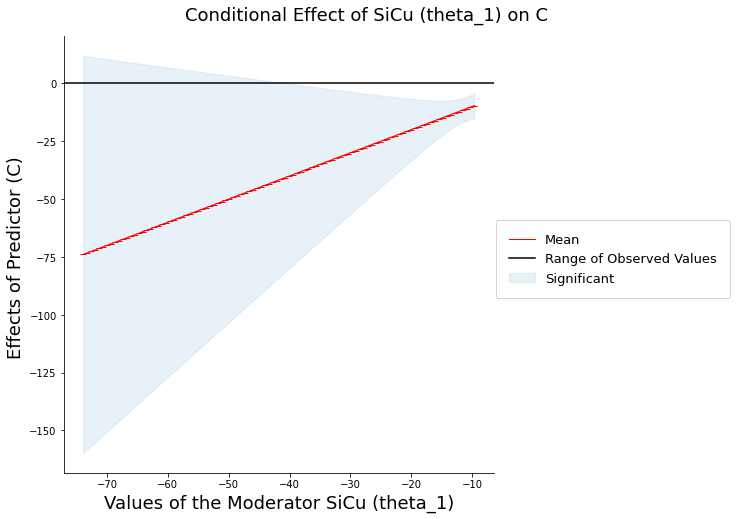

{'Negative on': [-73.90266664705611, -9.608451094179827], 'Positive on': []}

In [34]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
df = data
p = Process(data=df, model=1,  x="Si",  m= "theta_1", y="Texp", suppr_init=True)

direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()
mm=p.floodlight_direct_effect(mod_name="theta_1")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="theta_1")
floodlight_motiv_direct.get_significance_regions()
#p.summary()
print(mm)

g= p.plot_conditional_direct_effects(x="theta_1", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('theta_1', 'C')
g.fig.suptitle('Conditional Effect of SiCu (theta_1) on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Values',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator SiCu (theta_1)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()

## Conditional Effect of SiNi (theta_2) on Mn


### Conditional Effect of  Si on Ni, THETA_2

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.63]


****************************************************************************************



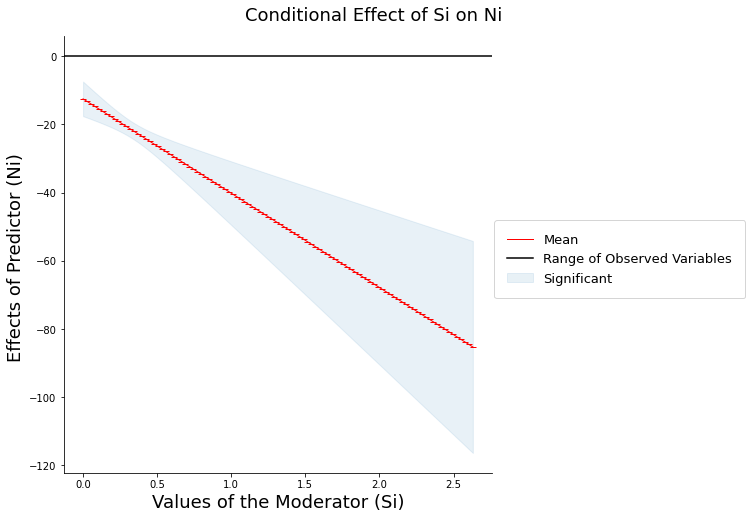

In [35]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Ni",  m= "Si", y="Texp", suppr_init=True)
direct_model = p.direct_model # The model for the direct effect
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Ni', 'Si')
g.fig.suptitle('Conditional Effect of Si on Ni', fontsize=18)
g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Variables',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", y_var="Effects of Predictor (Ni) ", fontsize=18)
plt.show(g)


In [36]:
from pyprocessmacro import utils as u
from pyprocessmacro import models as m
from pyprocessmacro import Process as p
p = Process(data=df, model=1, x="Ni",  m= "Si", y="Texp", suppr_init=True)

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
b = data["Si"]
b[:]
floodlight_motiv_direct= p.spotlight_direct_effect({"Si":b[:]})
effect= floodlight_motiv_direct.Effect
effect = pd.DataFrame(effect)
floodlight_motiv_direct


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Effect,SE,LLCI,ULCI,Si
0,-20.013369,1.296648,-22.554751,-17.471986,0.27
1,-20.013369,1.296648,-22.554751,-17.471986,0.27
2,-20.013369,1.296648,-22.554751,-17.471986,0.27
3,-20.013369,1.296648,-22.554751,-17.471986,0.27
4,-20.013369,1.296648,-22.554751,-17.471986,0.27
...,...,...,...,...,...
1267,-22.501564,1.242881,-24.937565,-20.065562,0.36
1268,-22.501564,1.242881,-24.937565,-20.065562,0.36
1269,-22.501564,1.242881,-24.937565,-20.065562,0.36
1270,-23.607428,1.315201,-26.185175,-21.029681,0.40


In [37]:
frames = [data, effect]
data = pd.concat(frames, axis=1)

data.columns = data.columns.str.replace('Effect', 'theta_2')
data

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc,Texp,theta_1,theta_2
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.000000,0.00000,0.0000,0.0000,1132.36,60.000,4.094345,770,-16.576297,-20.013369
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.000000,0.00000,0.0000,0.0000,1132.36,8.500,2.140066,805,-16.576297,-20.013369
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.000000,0.00000,0.0000,0.0000,1132.36,0.650,-0.430783,825,-16.576297,-20.013369
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.000000,0.00000,0.0000,0.0000,1132.36,0.050,-2.995732,840,-16.576297,-20.013369
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.000000,0.00000,0.0000,0.0000,1132.36,0.004,-5.521461,855,-16.576297,-20.013369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.000010,0.02800,0.0056,0.0140,1286.59,6.000,1.791759,755,-9.925171,-22.501564
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.000010,0.02800,0.0056,0.0140,1286.59,3.000,1.098612,775,-9.925171,-22.501564
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.000010,0.02800,0.0056,0.0140,1286.59,1.500,0.405465,790,-9.925171,-22.501564
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.000575,1.61000,0.3220,0.0140,1286.59,1.500,0.405465,650,-9.925171,-23.607428


### Conditional Effect of SiNi (theta_2) on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    theta_2, Range = [-85.26, -12.55]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [-85.26, -12.55]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


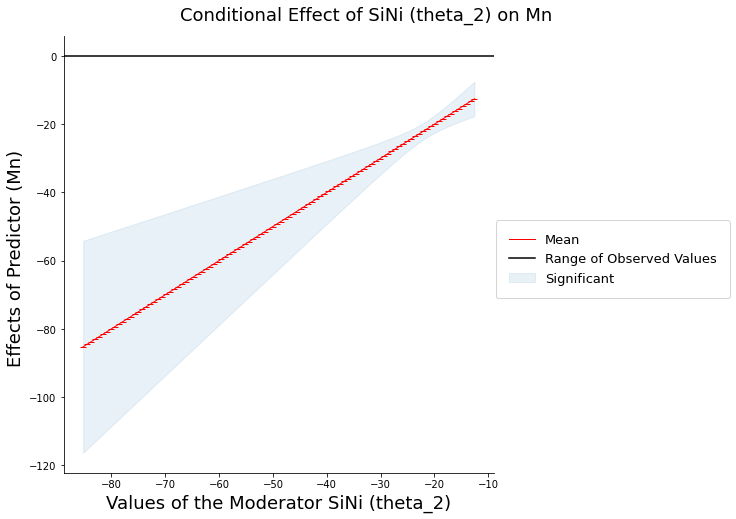

{'Negative on': [-85.25936966527944, -12.548783734056201], 'Positive on': []}

In [38]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
df = data
p = Process(data=df, model=1,  x="Ni",  m= "theta_2", y="Texp", suppr_init=True)

direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()
mm=p.floodlight_direct_effect(mod_name="theta_2")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="theta_2")
floodlight_motiv_direct.get_significance_regions()
#p.summary()
print(mm)

g= p.plot_conditional_direct_effects(x="theta_2", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('theta_2', 'Mn')
g.fig.suptitle('Conditional Effect of SiNi (theta_2) on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Values',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator SiNi (theta_2)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()

In [39]:
Data=data

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 
<h1><center>OBJECTIVE THREE</center></h1>

 
<h1><center>SIMILARITY MEASURE</center></h1>

<h1><center>EUCLIDEAN DISTANCE </center></h1>

### Data Preprocessing

In [40]:
columns_to_keep = ['Steel','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB','Pa','Rc','Texp']
ferriteStart_dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)

FF=ferriteFinish_dataframe.drop(['Steel','Pa','Rc'], axis = 1)
df=ferriteStart_dataframe.drop(['Steel','Pa','Rc','lnRc'], axis = 1)
FS = df.iloc[:-412 , :]

#FS.describe()
#FF.describe()


<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-40-29a8396a3e04>:3: DeprecationWarning: invalid escape sequence \s
  ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)


#### Data Standardization

In [41]:
scaler = StandardScaler().fit(FS)
rescaledX = scaler.transform(FS)

rescaledX=pd.DataFrame(rescaledX)
data1 = rescaledX
data1 = data1.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'Texp'], axis=1, inplace=False)
X_mc = data1


scaler = StandardScaler().fit(FF)
rescaledX = scaler.transform(FF)

rescaledX=pd.DataFrame(rescaledX)
data2 = rescaledX
data2 = data2.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'Texp'], axis=1, inplace=False)
Y_mc = data2


# SIMILARITY PLOT


In [42]:
columns_to_keep = ['Steel','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB','Pa','Rc','Texp']
ferriteStart_dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)

FF=ferriteFinish_dataframe.drop(['Steel','Pa','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB'], axis = 1)
df=ferriteStart_dataframe.drop(['Steel','lnRc','Pa','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB'], axis = 1)
FS = df.iloc[:-412 , :]

#FS.describe()
#FF.describe()

FS = FS.rename(columns={'Rc': 'Rc_s', 'Texp': 'Texp_s'})
FF = FF.rename(columns={'Rc': 'Rc_f', 'Texp': 'Texp_f'})

frames = [FS, FF]
result = pd.concat([FS, FF], axis = 1)
result

x1 = result.iloc[:, 0]
y1 = result.iloc[:, 1]
x2 = result.iloc[:, 2]
y2 = result.iloc[:, 3]

result


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-42-2593e6d6d43c>:3: DeprecationWarning: invalid escape sequence \s
  ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)


,Rc_s,Texp_s,Rc_f,Texp_f
0,60.000,770,145.000,600
1,8.500,805,21.500,675
2,0.650,825,2.000,690
3,0.050,840,0.195,695
4,0.004,855,0.019,700
...,...,...,...,...
855,1.000,690,7.500,640
856,0.180,710,10.000,630
857,0.045,720,20.000,625
858,8.400,750,0.100,720


In [43]:
scaler = StandardScaler().fit(result)
rescaledX = scaler.transform(result)

rescaledX=pd.DataFrame(rescaledX)
result1 = rescaledX
result1 = result1.set_axis(['Rc_s','Texp_s','Rc_f','Texp_f'], axis=1, inplace=False)
result1

a1 = result1.iloc[:, 0]
b1 = result1.iloc[:, 1]
a2 = result1.iloc[:, 2]
b2 = result1.iloc[:, 3]
#result1

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation

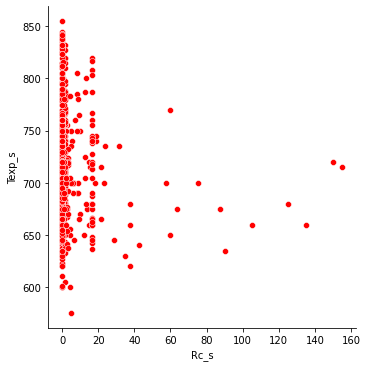

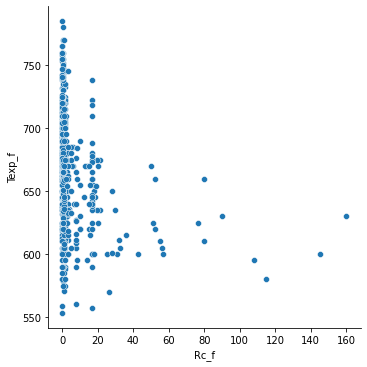

In [44]:
sns.relplot(x1,y1,data=result1, color='r')
sns.relplot(x2,y2,data=result1)
plt.show()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


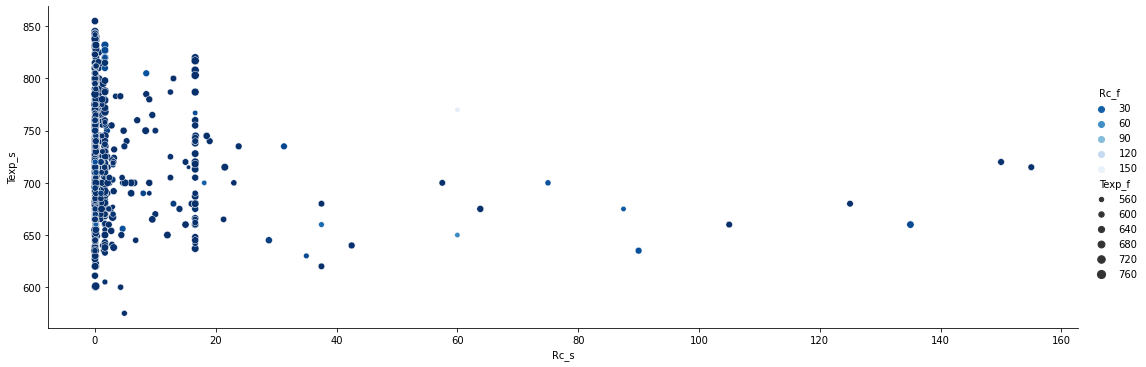

In [45]:
sns.relplot(x1, y1, x2, y2, data=result, aspect=3, hue='Rc_f', palette='Blues_r')


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


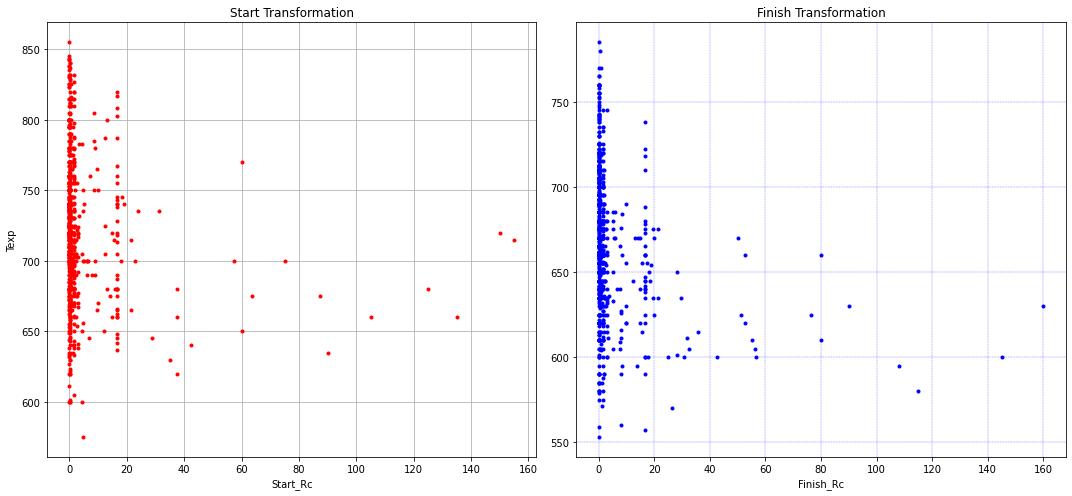

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize = (15,7))
axes[0].plot(x1, y1, '.',color='r', lw=2)
axes[0].grid(True)
axes[0].set_title('Start Transformation')
axes[0].set_xlabel('Start_Rc')
axes[0].set_ylabel('Texp')

axes[1].plot(x2, y2, '.', color='b' )
axes[1].grid(color='b', ls = '-.', lw = 0.25)
axes[1].set_title('Finish Transformation')
axes[1].set_xlabel('Finish_Rc')

fig.tight_layout()
plt.show()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


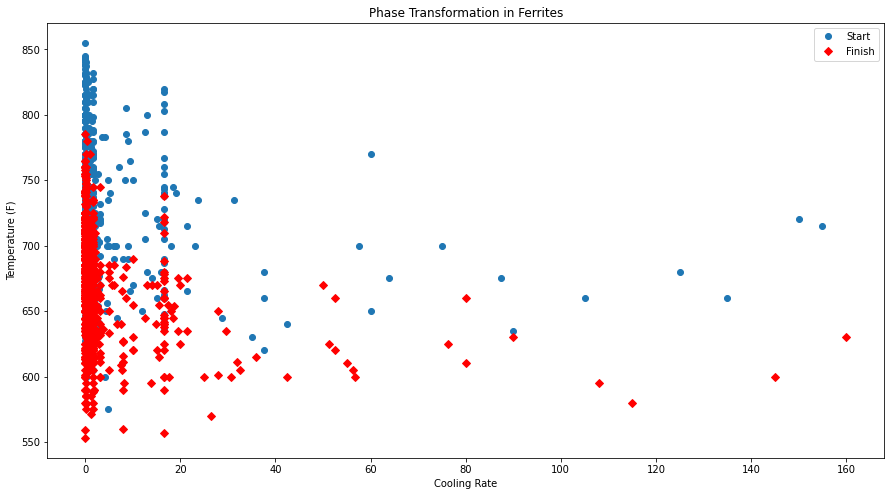

In [47]:
fig, axes = plt.subplots( 1,1, figsize = (15,8))

plt.plot( x1, y1, 'o')
plt.plot( x2, y2, 'D', color='r')
plt.title('Phase Transformation in Ferrites')
plt.xlabel('Cooling Rate')
plt.ylabel('Temperature (F)')
plt.legend(['Start', 'Finish']) 

In [48]:
import math
def EuclideanDistance(R1,R2,T1,T2):
    dist = np.sqrt((R2 - R1)**2 + (T2 - T1)**2)
    return dist
#print (calculateDistance(x1, y1, x2, y2))

RESULT = pd.DataFrame(result)
R2 = RESULT[["Rc_f"]]
T2 = RESULT[["Texp_f"]]
R1 = RESULT[["Rc_s"]]
T1 = RESULT[["Texp_s"]]

RESULT['Eucl_Dist'] = EuclideanDistance(RESULT['Rc_f'], RESULT['Texp_f'], RESULT['Rc_s'], RESULT['Texp_s'])
#RESULTS=RESULT.sort_values('Eucl_Dist', ascending=False)
RESULT

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rc_s,Texp_s,Rc_f,Texp_f,Eucl_Dist
0,60.000,770,145.000,600,843.282278
1,8.500,805,21.500,675,1030.278846
2,0.650,825,2.000,690,1073.730377
3,0.050,840,0.195,695,1090.077975
4,0.004,855,0.019,700,1104.984869
...,...,...,...,...,...
855,1.000,690,7.500,640,935.295274
856,0.180,710,10.000,630,942.467205
857,0.045,720,20.000,625,940.404276
858,8.400,750,0.100,720,1033.550468
